## CS 6241 Homework 1
### Fitting linear regression models to predict wine quality
Yujia Zhang yz685@cornell.edu

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model

In [20]:
#data is from https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009/data
data=pd.read_csv("/Users/yujiazhang/Desktop/CS 6241/Homework 1/winequality-red.csv")

In [21]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [30]:
from sklearn.metrics import mean_squared_error, r2_score

variables = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',\
             'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', \
             'density', 'pH', 'sulphates', 'alcohol']
trainsize = 1300
xtrain = data[variables][0:trainsize]
xtest = data[variables][trainsize:1598]
ytrain = data['quality'][0:trainsize]
ytest = data['quality'][trainsize:1598]

reg = linear_model.LinearRegression()
reg.fit(xtrain, ytrain)
print('coefficients: '+str(reg.coef_))
print('intercept: '+str(reg.intercept_))

# predict test set output and calculate mean squared error
pred = reg.predict(xtest)
print('mean squared error: '+str(mean_squared_error(pred, ytest)))
print('R squared: '+str(r2_score(ytest, pred)))

coefficients: [ 2.20655304e-02 -1.10609643e+00 -1.88336165e-01  8.17357745e-03
 -1.76877460e+00  3.33963795e-03 -3.60273580e-03 -1.55888592e+01
 -3.37284430e-01  8.09845987e-01  2.82003081e-01]
intercept: 19.5355527529228
mean squared error: 0.4263410670171544
R squared: 0.2871518279222891


Text(0.5, 1.0, 'Shrinkage of ridge regression coefficients')

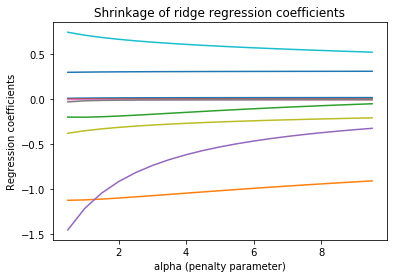

In [33]:
# ridge regression
Ridge_alphas = np.arange(0.5, 10, 0.5)
Ridge_coeffs = np.zeros([len(Ridge_alphas),len(variables)])

# record coefficients for a range of alphas
for i in range(len(Ridge_alphas)):
    regRidge = linear_model.Ridge(alpha=Ridge_alphas[i])
    regRidge.fit(xtrain, ytrain)
    Ridge_coeffs[i] = regRidge.coef_

plt.plot(Ridge_alphas,Ridge_coeffs)
plt.xlabel('alpha (penalty parameter)')
plt.ylabel('Regression coefficients')
plt.title('Shrinkage of ridge regression coefficients')

Text(0.5, 1.0, 'Shrinkage of Lasso regression coefficients')

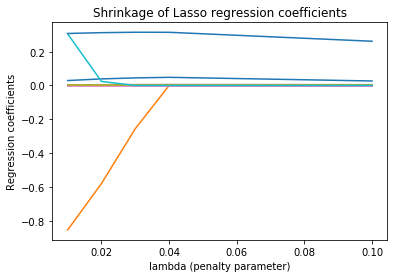

In [36]:
# lasso regression
Lasso_alphas = np.arange(0.01, 0.11, 0.01)
Lasso_coeffs = np.zeros([len(Lasso_alphas),len(variables)])

# record coefficients for a range of lambdas
for i in range(len(Lasso_alphas)):
    regLasso = linear_model.Lasso(alpha=Lasso_alphas[i])
    regLasso.fit(xtrain, ytrain)
    Lasso_coeffs[i] = regLasso.coef_


plt.plot(Lasso_alphas,Lasso_coeffs)
plt.xlabel('lambda (penalty parameter)')
plt.ylabel('Regression coefficients')
plt.title('Shrinkage of Lasso regression coefficients')

In [61]:
# run cross-validation to choose the best lambda for lasso

regLassoCV = linear_model.LassoCV(cv=5, random_state=0).fit(xtrain, ytrain)
lambdaCV = regLassoCV.alpha_
print('lambda selected by CV: '+str(lambdaCV))

# then apply this best lambda to fit the coefficients
regLasso = linear_model.Lasso(alpha=lambdaCV)
regLasso.fit(xtrain, ytrain)
print('coefficients: '+str(regLasso.coef_))
print('intercept: '+str(regLasso.intercept_))

# predict on test set
predLasso = regLasso.predict(xtest)
print('mean squared error: '+str(mean_squared_error(predLasso, ytest)))
print('R squared: '+str(r2_score(ytest, predLasso)))

lambda selected by CV: 0.007093800138749651
coefficients: [ 0.0263459  -0.93390646 -0.         -0.         -0.          0.00381155
 -0.00345486 -0.         -0.          0.38688414  0.30601492]
intercept: 2.5812837579120034
mean squared error: 0.44537909899294303
R squared: 0.2553199746390775
